-1.54477767561
0.0286350486616
0.0320090119363
0.043745765757


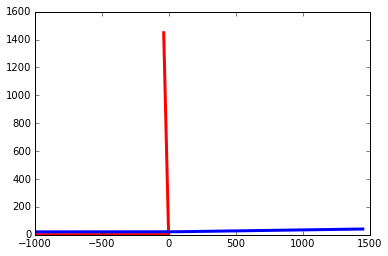

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

class particle(object):
    
    def __init__(self, m, x=0., y=0., vx=0., vy=0., Fx=0., Fy=0., KE=0.):
        self.m = m
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx=Fx
        self.Fy=Fx
        self.KE=KE
    
    def get_Forces(self, Vo, a):
        r=self.get_r()
        factor=24*Vo*(-3*a**6/r**7+1/r**4)*a**6
        self.Fx=factor*self.x
        self.Fy=factor*self.y
        
    def get_r(self):
        return math.sqrt(self.x**2+self.y**2)

    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.omega = self.omega + f/self.mass*dt
        self.theta = self.theta + self.omega*dt

                
    def verlet(self, Vo, a, dt):
        self.get_Forces(Vo, a)
        self.x += self.vx*dt +.5*self.Fx/self.m*dt**2
        self.y += self.vy*dt + .5*self.Fy/self.m*dt**2
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt
        self.get_Forces(Vo, a)
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt


db = 20.             
bo=1.
bmax = 100.
bsteps = int((bmax-bo)/db)

dt = 0.001
tmax = 1000.
tsteps = int(tmax/dt) 

Eo=3.
rmax=1000.

a=1.
Vo=1.

ts = np.zeros(shape=(bsteps,tsteps))
xs = np.zeros(shape=(bsteps,tsteps))
ys = np.zeros(shape=(bsteps,tsteps))
vxs = np.zeros(shape=(bsteps,tsteps))
vys = np.zeros(shape=(bsteps,tsteps))
Es = np.zeros(shape=(bsteps,tsteps))
bs=np.zeros(shape=(bsteps))
thetas=np.zeros(shape=(bsteps))

m=1. #defines masses and starting positions, start along x axis for circular orbits

b=bo
for n in range(0, bsteps):
    p=particle(m, -rmax, b, math.sqrt(2*Eo/m), 0., 0., 0.)
    for i in range(0, tsteps):
            xs[n,i] = p.x
            ys[n,i] = p.y
            vxs[n,i]= p.vx
            vys[n,i]= p.vy
            Es[n,i] = p.KE
            ts[n,i]=i*dt
            p.verlet(Vo, a, dt)
    thetas[n]=math.atan(p.y/p.x)
    print(thetas[n])
    bs[n]=b
    b+=db
 

#pyplot.plot(bs, thetas, color="#FF0000", ls='-', lw=3)

pyplot.plot(xs[0,:], ys[0,:], color="red", ls='-', lw=3)
pyplot.plot(xs[1,:], ys[1,:], color="blue", ls='-', lw=3)

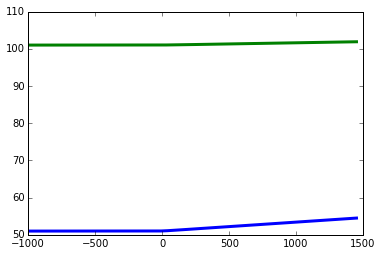

In [2]:
#pyplot.plot(xs[0,:], ys[0,:], color="red", ls='-', lw=3)
pyplot.plot(xs[1,:], ys[1,:], color="blue", ls='-', lw=3)
pyplot.plot(xs[2,:], ys[2,:], color="green", ls='-', lw=3)
